<a href="https://colab.research.google.com/github/varshagote/data-science-internship-test/blob/main/Data_Analysis_on_Electric_VE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install plotly
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/dataset.csv")

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])


Model                    20
Legislative District    286
Vehicle Location         24
Electric Utility        443
dtype: int64


In [ ]:
df_cleaned = df.dropna()

In [ ]:
print(df.isnull().sum().sum())

773


In [ ]:
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].mean())
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].mean())
df['Make'] = df['Make'].fillna('Unknown')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as pximport
import plotly.express as px
import pandas as pd

In [ ]:
fig = px.histogram(df,
                   x='Base MSRP',
                   title='Distribution of Base MSRP',
                   labels={'Base MSRP': 'Base MSRP ($)'},
                   nbins=30)
fig.show()


In [ ]:
fig = px.bar(df['Make'].value_counts().reset_index(),
             x='Make',
             y='count',
             title='Count of EVs by Make',
             labels={'Make': 'EV Make', 'count': 'Count'})
fig.update_layout(xaxis_title='EV Make', yaxis_title='Count')
fig.show()

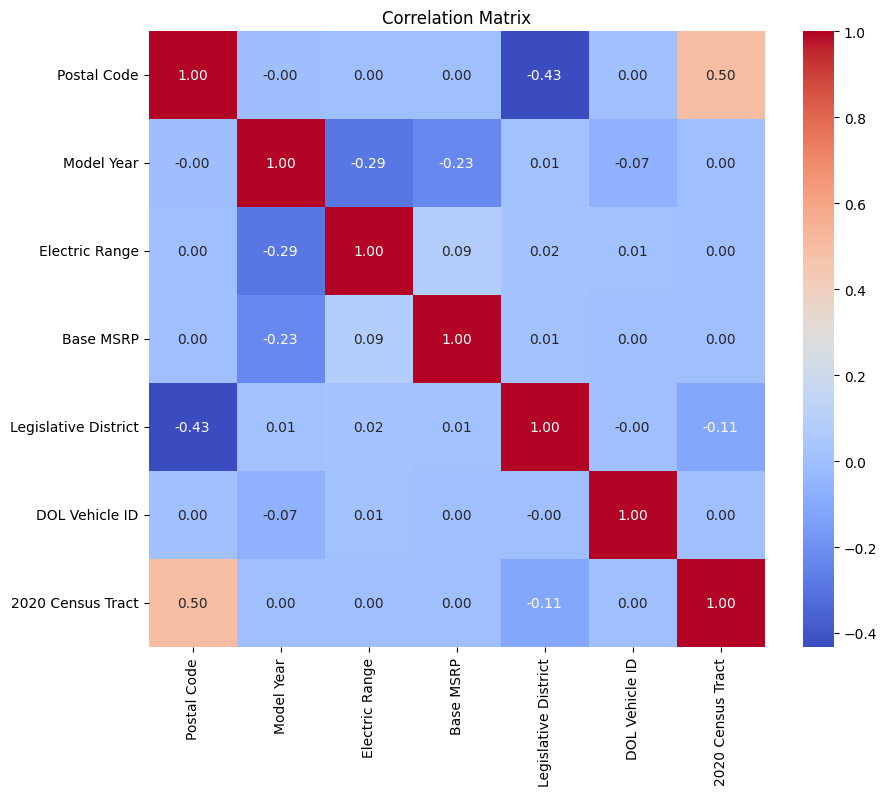

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
fig = px.box(df,
             x='Make',
             y='Base MSRP',
             title='Box Plot: Base MSRP by Make',
             labels={'Make': 'EV Make', 'Base MSRP': 'Base MSRP ($)'})

fig.show()

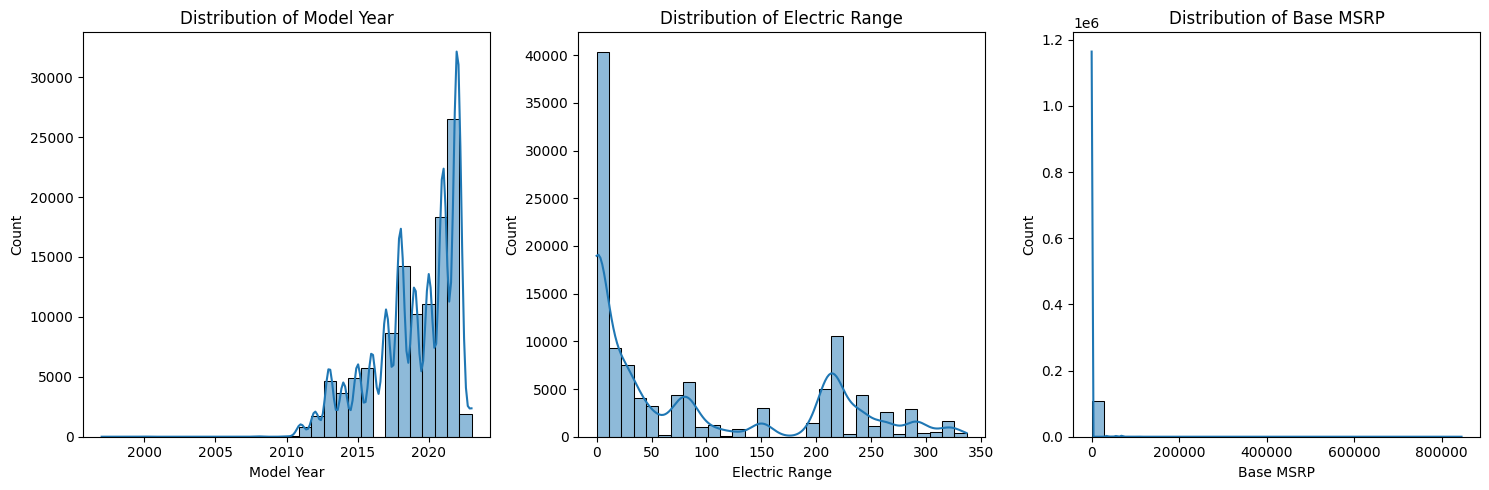

In [ ]:
numeric_cols = ['Model Year', 'Electric Range', 'Base MSRP']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

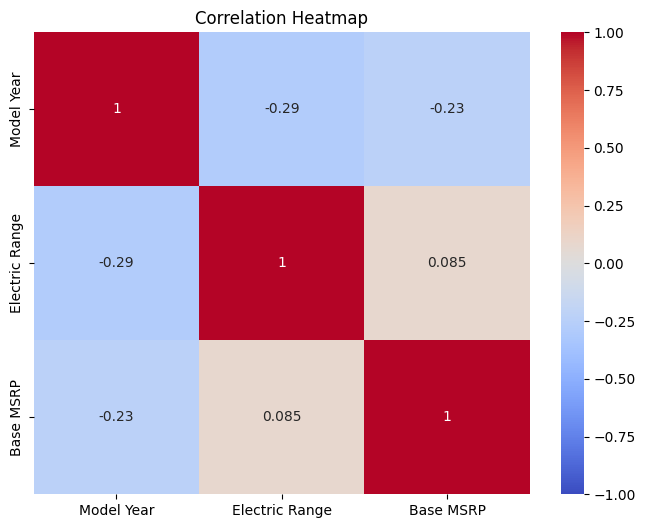

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
ev_by_state = df.groupby('State').agg({'Make': 'count', 'Electric Range': 'mean', 'Base MSRP': 'mean'}).reset_index()
ev_by_state.columns = ['State', 'EV Count', 'Avg Electric Range', 'Avg MSRP']
fig = px.choropleth(ev_by_state,
                    locations='State',
                    locationmode='USA-states',
                    color='EV Count',
                    hover_name='State',
                    hover_data={'Avg Electric Range': ':.2f', 'Avg MSRP': ':.2f', 'EV Count': True},
                    color_continuous_scale='blackbody',
                    scope='usa',
                    title='State-wise EV Distribution in the USA (Black to Yellow)')
fig.update_layout(
    geo=dict(
        showcoastlines=True,
        lakecolor='rgb(255, 255, 255)',
        projection_type='albers usa'
    ),
    title_x=0.5
)

fig.show()

In [ ]:
ev_by_make_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')
make_year_grid = pd.MultiIndex.from_product([ev_by_make_year['Model Year'].unique(),
                                             ev_by_make_year['Make'].unique()],
                                             names=['Model Year', 'Make']).to_frame(index=False)
ev_by_make_year_full = pd.merge(make_year_grid, ev_by_make_year, on=['Model Year', 'Make'], how='left').fillna(0)
fig = px.bar(ev_by_make_year_full,
             x='EV Count',
             y='Make',
             color='Make',
             animation_frame='Model Year',
             orientation='h',
             title='Racing Bar Plot: EV Makes Over the Years',
             range_x=[0, ev_by_make_year_full['EV Count'].max() + 100],
             hover_name='Make')
fig.update_layout(
    xaxis_title="Number of EVs",
    yaxis_title="Vehicle Make",
    title_x=0.5,
    showlegend=False
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()